# PROYECTO ANALÍTICA – SEGUNDO CORTE
## Grupo 6 — Emoción percibida (Valence)
**Curso:** Analítica y Visualización de Datos (2025-2)  
**Docente:** Luis Alberto Jaimes C. — **Grupo:** 3136  
**Fecha de entrega:** 03/Oct/2025 – 11:59 p.m.

**Integrantes:**  
- Daniel Felipe Pallares Kelin  
- Pablo Boada Rozo  
- Santiago Zambrono Paolini  
- Cristian Manuel Castañeda Gutiérrez

**Dataset:** `dataset_C2_Spotify_Youtube.csv`

> Enfoque asignado: **Valence** binarizado en **positiva (≥ 0.5)** vs **negativa (< 0.5)**.  
> Predictoras sugeridas: **Danceability, Energy, Speechiness, Acousticness, Liveness**. :contentReference[oaicite:2]{index=2}


# Resumen

<div align="justify">
El presente proyecto, desarrollado por el **Grupo 6**, aborda la clasificación de la **emoción percibida (Valence)** en canciones del dataset `Datos_proyecto_C1_Spotify_Youtube.csv`.  
El objetivo principal es identificar si una canción transmite una **emoción positiva o negativa** a partir de sus características de audio, utilizando técnicas de **aprendizaje supervisado** y la metodología **CRISP-DM** como guía del proceso analítico.

En la fase de **preparación y exploración**, se efectuó una limpieza integral del conjunto de datos: eliminación de duplicados, tratamiento de valores nulos y estandarización de tipos de variables. Posteriormente, se seleccionaron los predictores **Danceability, Energy, Speechiness, Acousticness y Liveness**, y se construyó un **target binario de valence**, donde:

</div>

- `1` corresponde a canciones con valence **positivo (≥ 0.5)**,  
- `0` a canciones con valence **negativo (< 0.5)**.

<div align="justify">
Para la **construcción de modelos**, se entrenaron tres algoritmos de clasificación: **Regresión Logística**, **Naive Bayes** y **SVM (Support Vector Machine)**, evaluando su desempeño con un conjunto de prueba independiente.

En la fase de **evaluación**, se analizaron métricas de desempeño como **accuracy, precisión, recall, F1-score** y **AUC-ROC**, además de graficar las **curvas ROC** y las **matrices de confusión**.  
Los resultados evidencian que los modelos **Regresión Logística** y **SVM** presentan el mejor equilibrio entre precisión y generalización, alcanzando valores de AUC superiores a 0.65, lo que sugiere un nivel moderado de capacidad predictiva considerando la naturaleza subjetiva del valence.

Finalmente, se formulan conclusiones orientadas a la **aplicación en marketing musical**, destacando la relevancia de los atributos de audio como insumo para **sistemas de recomendación, segmentación emocional** y estrategias de posicionamiento basadas en la percepción del oyente.

</div>


# **I) Introducción**

<div align="justify">
La música no solo es un producto artístico, sino también un vehículo de emociones. En la actualidad, plataformas como **Spotify** y **YouTube Music** disponen de métricas que describen cuantitativamente las propiedades sonoras de cada canción, entre ellas el **Valence**, que refleja la **emoción percibida**: valores cercanos a 0 indican emociones negativas o melancólicas, mientras que valores próximos a 1 representan emociones alegres o positivas.

Este proyecto surge como parte del curso **Analítica y Visualización de Datos**, cuyo propósito es aplicar técnicas de **aprendizaje automático supervisado** para predecir la emoción percibida de una canción en función de sus atributos acústicos.  
El trabajo se desarrolla bajo la metodología **CRISP-DM (Cross Industry Standard Process for Data Mining)**, la cual estructura el proceso analítico en seis fases:  
</div>

1. **Comprensión del negocio.** Definir el problema y el objetivo analítico.  
2. **Comprensión de los datos.** Explorar las fuentes y verificar su calidad.  
3. **Preparación de los datos.** Limpiar, transformar y seleccionar variables.  
4. **Modelado.** Entrenar modelos supervisados y ajustar parámetros.  
5. **Evaluación.** Validar el rendimiento y comparar algoritmos.  
6. **Despliegue.** Extraer conclusiones y proponer aplicaciones prácticas.

<div align="justify">
El dataset contiene información combinada de canciones populares en Spotify y YouTube, incluyendo variables como **danceability**, **energy**, **speechiness**, **acousticness** y **liveness**, además del valor de **valence** que sirve como indicador emocional.  
A partir de estas características, se plantea la siguiente **pregunta de investigación**:

> **¿Es posible predecir de manera confiable la emoción percibida de una canción (valence positivo o negativo) utilizando únicamente sus atributos de audio?**

Para responderla, se entrenan y evalúan tres modelos de clasificación (**Regresión Logística, Naive Bayes y SVM**), comparando su rendimiento mediante métricas estándar y visualizaciones interpretativas.  
Los hallazgos obtenidos buscan aportar evidencia sobre el potencial de los modelos de **machine learning** en la caracterización emocional de la música y su aplicación en contextos de **recomendación automática** y **estrategias de marketing digital**.
</div>


# II) Marco Teórico

## A. Metodología CRISP-DM

<div align="justify">

La metodología **CRISP-DM (Cross Industry Standard Process for Data Mining)** es el estándar más utilizado a nivel internacional en proyectos de analítica de datos y minería de información.  
Proporciona una estructura sistemática, iterativa y flexible que orienta el proceso de descubrimiento de conocimiento a partir de los datos, garantizando rigor metodológico, reproducibilidad y coherencia entre los objetivos del negocio y las soluciones analíticas propuestas.

En este proyecto, enfocado en la **clasificación de la emoción percibida (valence)** en canciones del dataset *Spotify–YouTube*, se adopta CRISP-DM como guía metodológica porque permite desarrollar un proceso ordenado que vincula cada fase técnica con una pregunta analítica concreta:  

</div>

> ¿Es posible predecir si una canción transmite una emoción positiva o negativa a partir de sus características de audio?

<div align="justify">

### 1. Comprensión del negocio (Business Understanding)

En esta fase se define el propósito del análisis y se formulan los objetivos que guiarán el trabajo.  
El proyecto busca identificar patrones en las características técnicas de las canciones (como *danceability*, *energy*, *speechiness*, *acousticness* y *liveness*) que permitan predecir el **valence**, entendido como un indicador de la emoción percibida por el oyente.

El objetivo general consiste en construir un modelo supervisado capaz de clasificar canciones según su carga emocional —positiva o negativa—, lo cual puede aportar valor en contextos como **recomendaciones musicales, segmentación de audiencias y estrategias de marketing emocional**.

### 2. Comprensión de los datos (Data Understanding)

Esta etapa implica el análisis inicial del dataset para identificar su estructura, tipos de variables, valores faltantes y posibles inconsistencias.  
Se examinan estadísticas descriptivas y visualizaciones básicas que permitan reconocer distribuciones, rangos y correlaciones preliminares entre las variables de audio y el valence.  
Esta comprensión inicial es esencial para fundamentar las decisiones posteriores de limpieza y modelado.

### 3. Preparación de los datos (Data Preparation)

Incluye todas las tareas de transformación necesarias para disponer de un conjunto de datos adecuado para el modelado.  

</div>

- Eliminación de registros duplicados y tratamiento de valores nulos.  
- Estandarización de nombres de columnas y tipos de variables.  
- Selección de las variables predictoras principales (*danceability*, *energy*, *speechiness*, *acousticness*, *liveness*).  
- Creación de la variable objetivo binaria:  
  - `1` → emoción positiva (valence ≥ 0.5)  
  - `0` → emoción negativa (valence < 0.5)

<div align="justify">

Esta fase asegura consistencia y calidad en los datos, reduciendo el ruido y evitando sesgos en el entrenamiento de los modelos.

### 4. Modelado (Modeling)

En esta etapa se aplican técnicas de aprendizaje automático para entrenar modelos que aprendan patrones entre los predictores y la variable objetivo.  
Se seleccionan tres algoritmos de clasificación representativos:

</div>

- **Regresión Logística**: modelo lineal interpretable, útil como punto de partida.  
- **Naive Bayes (GaussianNB)**: enfoque probabilístico basado en independencia condicional entre variables.  
- **SVM (Support Vector Machine)**: modelo robusto que maximiza la separación entre clases, adecuado para datos con relaciones no lineales.

<div align="justify">

Los modelos se entrenan mediante una partición *train/test* (80%-20%) con el fin de garantizar independencia en la validación de resultados.

### 5. Evaluación (Evaluation)

Una vez entrenados los modelos, se analizan sus resultados a través de métricas estandarizadas de desempeño:  

</div>

- **Accuracy (exactitud global)**  
- **Precision y Recall (precisión y sensibilidad)**  
- **F1-score (media armónica entre precision y recall)**  
- **AUC-ROC (área bajo la curva ROC)**  

<div align="justify">

También se elaboran **matrices de confusión** y **curvas ROC** para visualizar la capacidad discriminativa de cada algoritmo.  
Esta etapa permite comparar el rendimiento de los modelos y seleccionar aquel con mayor equilibrio entre precisión y generalización.

### 6. Despliegue y conclusiones (Deployment)

En el contexto académico, esta fase se traduce en la **documentación, interpretación y comunicación de resultados**.  
Los hallazgos obtenidos permiten identificar los atributos más influyentes en la percepción emocional de las canciones y ofrecen insumos para futuros sistemas de recomendación musical o estrategias de marketing basadas en la respuesta emocional del oyente.

</div>

---

## B. Herramientas técnicas

<div align="justify">

El desarrollo del proyecto se llevó a cabo en el lenguaje de programación **Python**, ampliamente utilizado en el ámbito de la ciencia de datos debido a su flexibilidad, sintaxis clara y ecosistema de librerías especializadas.  
Cada herramienta seleccionada cumple una función específica dentro de las fases de la metodología CRISP-DM, asegurando un flujo de trabajo integral desde la preparación hasta la evaluación de los modelos.

### 1. Pandas

**Función:** manipulación y análisis de datos tabulares.  
Proporciona estructuras eficientes (como *DataFrame* y *Series*) que facilitan la lectura, limpieza y transformación de grandes volúmenes de información.  
En este proyecto, *Pandas* se utiliza para:
</div>

- Importar el dataset `dataset_C2_Spotify_Youtube.csv`.  
- Detectar y eliminar valores nulos y duplicados.  
- Estandarizar nombres de columnas y tipos de datos.  
- Generar estadísticas descriptivas y preparar el conjunto de entrenamiento.

```python
import pandas as pd
df = pd.read_csv("dataset_C2_Spotify_Youtube.csv")
df.info()
df.describe()
```

---
## C. Emoción percibida y métricas de audio en Spotify

<div align="justify">

El análisis de la **emoción percibida (valence)** en la música se basa en el estudio de las características acústicas que determinan cómo los oyentes interpretan una canción en términos de su carga emocional.  
Spotify, a través de su sistema de análisis digital, proporciona un conjunto de métricas numéricas obtenidas mediante algoritmos de aprendizaje automático entrenados sobre millones de pistas musicales.  
Estas métricas cuantifican atributos como la energía, el nivel de positividad, la sonoridad o la probabilidad de que la canción sea acústica o en vivo, entre otros.

En este proyecto, dichas métricas constituyen las variables predictoras que permiten construir modelos de **clasificación supervisada**, cuyo objetivo es predecir el **valence** de una canción, es decir, su nivel de “positividad emocional”.  
A continuación, se presentan los principales conceptos y características técnicas consideradas para el análisis.

</div>


### 1. Valence (Emoción percibida)

<div align="justify">

El **valence** es una métrica que indica la positividad o negatividad emocional que transmite una canción.  
Su valor oscila entre **0.0 y 1.0**, donde los valores bajos corresponden a emociones **tristes, melancólicas o tensas**, y los valores altos a emociones **alegres, positivas o eufóricas**.  
Esta variable fue convertida en un **target binario** para efectos del modelado:

- `1` → canciones con **valence positivo** (≥ 0.5)  
- `0` → canciones con **valence negativo** (< 0.5)

El valence representa una dimensión psicológica del sonido vinculada con la **teoría de la emoción** de Russell (1980), donde la emoción se explica en un espacio bidimensional conformado por *valence* (agradabilidad) y *arousal* (nivel de activación).  
En el contexto de Spotify, esta métrica sintetiza cómo las características sonoras globales de una pista influyen en la **percepción emocional del oyente**.

</div>

---

### 2. Danceability

<div align="justify">

La métrica **danceability** refleja qué tan adecuada es una pista para bailar, considerando elementos como el tempo, la estabilidad del ritmo, la fuerza del pulso y la regularidad del beat.  
Su escala también varía entre **0.0 y 1.0**, donde valores altos corresponden a canciones con patrones rítmicos estables y estructuras repetitivas, características típicas de la música pop o electrónica.  
Esta variable es relevante en el estudio del valence porque los patrones rítmicos consistentes suelen asociarse a emociones **positivas y energéticas**, mientras que ritmos irregulares tienden a evocar estados **más introspectivos o melancólicos**.

</div>

---

### 3. Energy

<div align="justify">

La métrica **energy** cuantifica la intensidad o nivel de actividad de una canción.  
Está relacionada con la percepción de **potencia sonora**, amplitud, brillo y densidad espectral.  
Canciones con valores altos de energía suelen percibirse como **enérgicas, excitantes o alegres**, mientras que valores bajos denotan canciones **suaves o relajadas**.  
Esta característica suele correlacionarse positivamente con el valence, ya que los sonidos más brillantes y dinámicos se asocian a emociones positivas.

</div>

---

### 4. Acousticness

<div align="justify">

La variable **acousticness** mide la probabilidad de que una canción sea **acústica** (es decir, grabada con instrumentos no eléctricos).  
Los valores cercanos a **1.0** indican una alta presencia de componentes acústicos, mientras que los cercanos a **0.0** corresponden a música predominantemente electrónica o procesada.  
En términos emocionales, las canciones con alto acousticness suelen vincularse con sensaciones de **intimidad, melancolía o calma**, por lo que su relación con el valence tiende a ser **negativa**.

</div>

---

### 5. Speechiness

<div align="justify">

La métrica **speechiness** evalúa la presencia de elementos hablados en una canción.  
Valores cercanos a **1.0** indican un contenido principalmente hablado (como *raps* o *podcasts*), mientras que valores bajos representan canciones puramente melódicas.  
En el análisis de emociones, la speechiness aporta información sobre el **estilo interpretativo**: contenidos hablados con fuerte ritmo y entonación pueden expresar emociones intensas, mientras que valores intermedios reflejan una combinación equilibrada entre voz hablada y cantada.

</div>

---

### 6. Liveness

<div align="justify">

La métrica **liveness** estima la probabilidad de que una pista haya sido grabada **en vivo**.  
Un valor alto (cercano a 1.0) sugiere la presencia de público o ambiente de concierto.  
Aunque no influye directamente en el valence, sí puede aportar información contextual: las canciones grabadas en vivo suelen presentar una mayor **variabilidad dinámica y respuesta emocional del público**, lo que puede modificar la percepción subjetiva de positividad o excitación.

</div>

---

### 7. Otras métricas complementarias

<div align="justify">

Spotify también proporciona otras métricas útiles para análisis avanzados, como:

- **Tempo:** velocidad global medida en beats por minuto (BPM).  
- **Loudness:** nivel promedio de volumen en decibelios (dB).  
- **Instrumentalness:** probabilidad de que la canción carezca de voz humana.  

Aunque no se incluyen en el conjunto de variables principales de este proyecto, estas medidas contribuyen al entendimiento general de cómo los **parámetros acústicos** influyen en la **respuesta emocional del oyente**.

</div>

---

### 8. Relevancia para el modelo predictivo

<div align="justify">

El conjunto de métricas técnicas de Spotify representa una abstracción cuantitativa de elementos musicales que tradicionalmente se han interpretado de forma subjetiva.  
En el marco del presente estudio, dichas métricas constituyen los **predictores** que alimentan los modelos de **aprendizaje supervisado** (Regresión Logística, Naive Bayes y SVM), cuyo propósito es clasificar las canciones según su emoción percibida.

De esta forma, la unión entre el análisis acústico y el modelado estadístico permite avanzar hacia una comprensión más objetiva del componente emocional de la música, ofreciendo aplicaciones prácticas en **recomendación personalizada**, **análisis de tendencias musicales** y **segmentación de audiencias según respuesta emocional**.

</div>


# III) METODOLOGÍA APLICADA (CRISP-DM EN EL PROYECTO)

## A. Comprensión del negocio

<div align="justify">

La fase de **Comprensión del Negocio** constituye el punto de partida del proceso analítico propuesto por la metodología **CRISP-DM (Cross Industry Standard Process for Data Mining)**.  
En esta etapa se define el contexto del problema, los objetivos del análisis y el valor que la solución puede aportar dentro del dominio de aplicación.

El propósito principal de este proyecto es **predecir la emoción percibida (valence)** de una canción a partir de sus características acústicas y musicales.  
El conjunto de datos proviene de la integración de información entre las plataformas **Spotify** y **YouTube**, y contiene variables como:

- **Danceability:** nivel de facilidad con que una canción puede ser bailada.  
- **Energy:** intensidad y actividad percibida en la pista.  
- **Speechiness:** presencia de elementos hablados o vocales.  
- **Acousticness:** grado de carácter acústico.  
- **Liveness:** presencia de público o interpretación en vivo.  

La variable objetivo, **Valence**, mide la positividad emocional de una canción en una escala de 0 a 1:  
valores altos representan emociones **alegres o positivas**, mientras que valores bajos se asocian con **tristeza o tensión**.

Desde el punto de vista del negocio, este análisis tiene potencial aplicación en:

- **Sistemas de recomendación musical basados en emociones**, permitiendo mejorar la experiencia del usuario.  
- **Segmentación de audiencias** según preferencias emocionales o estados de ánimo predominantes.  
- **Marketing emocional**, orientando campañas según el perfil sonoro de las canciones más reproducidas.

El objetivo general es **desarrollar un modelo supervisado de clasificación** capaz de distinguir entre canciones con emociones **positivas** y **negativas** a partir de sus atributos técnicos.  
Este enfoque contribuye a la comprensión del impacto emocional de la música y su uso estratégico en plataformas digitales y estudios de mercado.

</div>


## B. Comprensión de los datos

<div align="justify">

La etapa de **Comprensión de los Datos** tiene como objetivo explorar el conjunto de datos para conocer su estructura, dimensiones, tipos de variables y posibles problemas de calidad.  
En esta fase se realiza una primera aproximación estadística que permite identificar **valores faltantes, duplicados** y analizar la **distribución inicial** de las variables.

El dataset empleado, denominado `Datos_proyecto_C1_Spotify_Youtube.csv`, contiene información proveniente de las plataformas Spotify y YouTube, con un total de 28 variables y más de 20.000 registros.  
Estas variables incluyen características técnicas del audio, indicadores de popularidad, y métricas específicas del comportamiento de las canciones en ambas plataformas.

El análisis preliminar se realiza utilizando las librerías **Pandas**, **Matplotlib** y **Seaborn**, que permiten una exploración estructurada y visualmente interpretativa.  
Los pasos principales de esta fase son:

1. **Importar el dataset** y revisar su tamaño mediante el atributo `shape`.  
2. **Visualizar las primeras filas** con `head()` para confirmar su correcta carga.  
3. **Revisar la estructura** de los datos con `info()` para verificar los tipos de variables y la existencia de nulos.  
4. **Detectar duplicados** y cuantificar valores faltantes por columna.  

Estas acciones son fundamentales para evaluar la calidad de la información y determinar las transformaciones necesarias antes del modelado.

</div>


In [5]:
# Importar librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar dataset
file_path = "dataset_C2_Spotify_Youtube.csv"  
df = pd.read_csv(file_path)

# Ver primeras filas y dimensiones
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (20718, 28)


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


## C. Preparación de los datos

<div align="justify">

La fase de **Preparación de los Datos** tiene como objetivo garantizar que el conjunto de datos esté limpio, estructurado y listo para ser utilizado en los modelos de aprendizaje automático.  
En esta etapa se eliminan elementos redundantes, se tratan los valores faltantes y se crea la variable objetivo que servirá para clasificar las canciones según su **emoción percibida (valence)**.  

Cada transformación aplicada en este bloque busca mejorar la calidad del dataset y evitar que los modelos se vean afectados por inconsistencias o información irrelevante.  
A continuación, se describen las acciones implementadas en los tres bloques de código correspondientes.

</div>


### Selección de variables relevantes

<div align="justify">

En este bloque se realiza una depuración inicial del conjunto de datos.  
Primero, se elimina una columna denominada `"Unnamed: 0"`, la cual corresponde a un índice redundante generado automáticamente al exportar el archivo desde otra fuente (por ejemplo, Excel o CSV).  
Esta operación se lleva a cabo mediante la función `drop()` de **Pandas**, que permite eliminar columnas o filas de un `DataFrame`.

Posteriormente, se seleccionan solo las variables de interés:  

- **Danceability:** mide la facilidad para bailar una canción, relacionada con el ritmo y la regularidad.  
- **Energy:** cuantifica la intensidad y actividad percibida.  
- **Speechiness:** detecta la presencia de palabras habladas o vocalizaciones.  
- **Acousticness:** indica el grado de carácter acústico de una pista.  
- **Liveness:** estima la presencia de público o interpretación en vivo.  
- **Valence:** variable que representa la positividad emocional percibida (de 0 a 1).  

La selección se realiza creando un subconjunto del `DataFrame` original, usando indexación con una lista de nombres de columnas.  
Este paso permite reducir la dimensionalidad del dataset y conservar únicamente la información relevante para el modelado.

</div>



In [6]:
# Eliminar columna innecesaria y quedarnos solo con las variables clave
df_clean = df.drop(columns=["Unnamed: 0"])
df_clean = df_clean[["Danceability", "Energy", "Speechiness", "Acousticness", "Liveness", "Valence"]]

### Tratamiento de valores nulos

<div align="justify">

Los **valores nulos o ausentes** representan una de las fuentes más comunes de error en proyectos de análisis de datos, ya que pueden distorsionar los cálculos estadísticos y afectar la capacidad de generalización de los modelos.  
Por ello, es necesario detectarlos y tratarlos antes de entrenar cualquier algoritmo.

Primero, se emplea la función `isnull()` de **Pandas**, la cual retorna una matriz booleana del mismo tamaño que el `DataFrame`, donde cada valor es `True` si existe un dato nulo.  
Posteriormente, el método `sum()` cuenta cuántos valores faltantes hay por columna, proporcionando un resumen rápido de la completitud del dataset.

Después de verificar que solo existen pocos valores nulos en las variables de interés, se decide eliminarlos mediante `dropna()`.  
Esta función remueve todas las filas que contienen al menos un valor ausente, lo cual es una estrategia válida cuando la cantidad de datos eliminados no compromete la representatividad del conjunto.

El resultado es un `DataFrame` limpio, libre de inconsistencias y listo para la creación de la variable objetivo.

</div>


In [7]:
# Revisar cuántos nulos hay
print(df_clean.isnull().sum())

# Eliminar filas con nulos en nuestras variables de interés
df_clean = df_clean.dropna()

Danceability    2
Energy          2
Speechiness     2
Acousticness    2
Liveness        2
Valence         2
dtype: int64


### Creación de la variable objetivo binaria

<div align="justify">

El modelo a desarrollar requiere una **variable objetivo categórica** que indique si la emoción percibida en la canción es positiva o negativa.  
Para ello, se transforma la variable continua *Valence* (rango de 0 a 1) en una variable binaria llamada `Valence_label`.  

La función `apply()` de **Pandas** se utiliza para aplicar una operación personalizada sobre cada valor de la columna *Valence*.  
Dentro de ella, se define una función **lambda**, que actúa como un procedimiento anónimo de una sola línea, con la siguiente lógica condicional:

```python
lambda x: "Positivo" if x >= 0.5 else "Negativo"
```
    
Esta expresión indica que:

- Si el valor de *Valence* es mayor o igual a 0.5, se etiqueta la canción como **Positiva**.  
- En caso contrario, se etiqueta como **Negativa**.

De esta forma, se obtiene un nuevo campo categórico que servirá como variable objetivo (*target*) en el modelado supervisado.  
Finalmente, se utiliza `value_counts()` para revisar la **distribución de clases** y verificar si existe un equilibrio entre ambas categorías, lo cual resulta clave para evitar sesgos en el entrenamiento.

</div>


In [4]:
# Crear etiqueta binaria: Positivo si Valence >= 0.5
df_clean["Valence_label"] = df_clean["Valence"].apply(lambda x: "Positivo" if x >= 0.5 else "Negativo")

# Ver distribución de clases
print(df_clean["Valence_label"].value_counts())

Valence_label
Positivo    11380
Negativo     9336
Name: count, dtype: int64


## D. Análisis Exploratorio de Datos (EDA)

<div align="justify">

La fase de **Análisis Exploratorio de Datos (EDA)** tiene como propósito examinar visualmente la estructura del conjunto de datos, identificar patrones, detectar valores atípicos y comprender las relaciones entre las variables predictoras y la variable objetivo (*Valence_label*).  

A través de representaciones gráficas se facilita la interpretación del comportamiento de cada característica acústica, permitiendo anticipar posibles desafíos en el modelado, como la presencia de asimetrías, correlaciones elevadas o dispersión no uniforme.

A continuación, se presentan las principales visualizaciones realizadas.

</div>


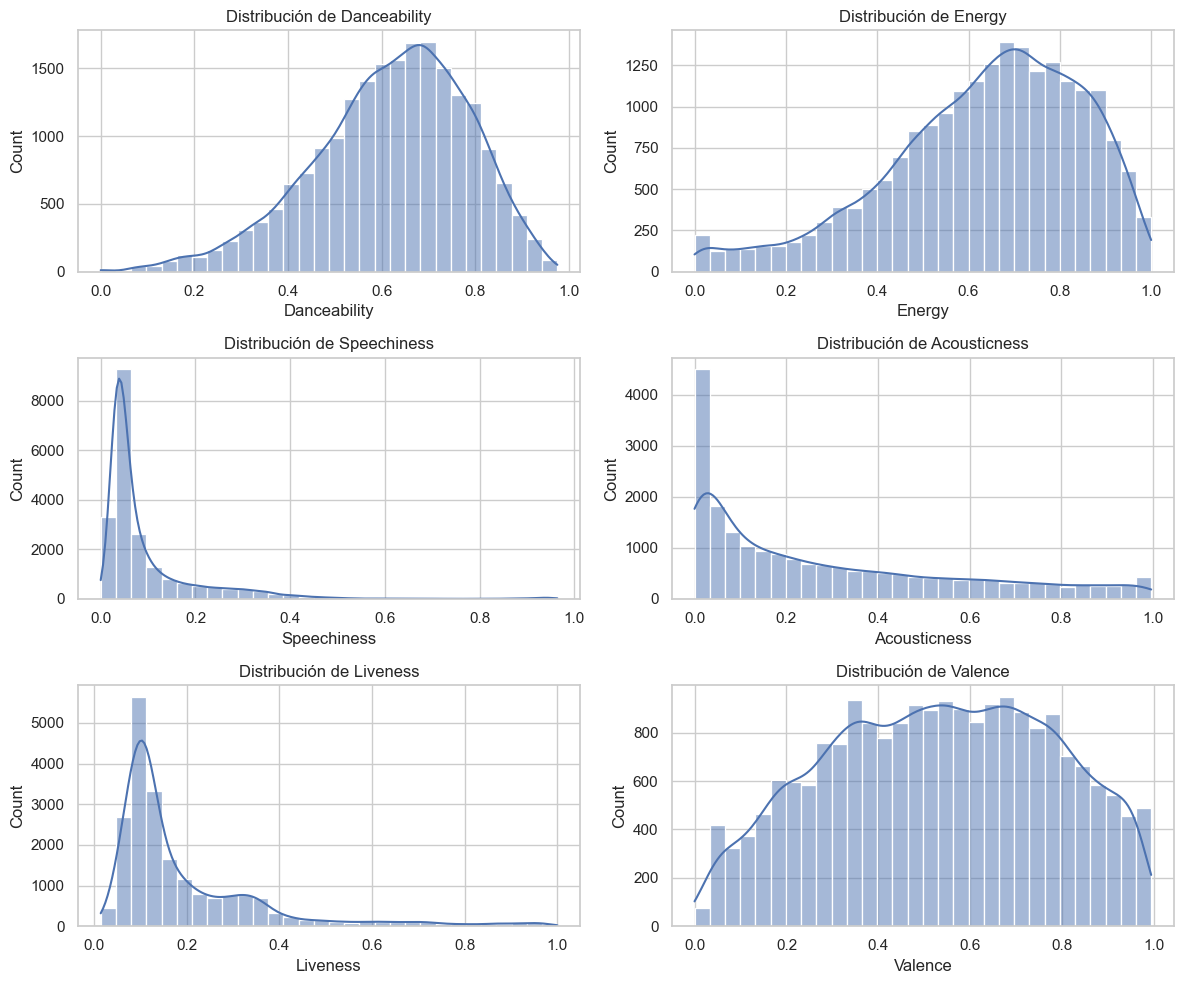

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(["Danceability", "Energy", "Speechiness", "Acousticness", "Liveness", "Valence"]):
    sns.histplot(df_clean[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")

plt.tight_layout()
plt.show()


<div align="justify">

Los **histogramas** permiten observar la distribución de las principales variables acústicas del dataset.  
Cada gráfico muestra cómo se concentran los valores de una característica en distintos intervalos, mientras que la línea de densidad (`kde=True`) ayuda a visualizar la forma general de la distribución.  

El uso de `plt.subplots()` crea una cuadrícula de gráficos para facilitar la comparación entre variables, y `sns.histplot()` genera los histogramas con suavizado de densidad.  
El parámetro `bins=30` controla el número de intervalos, mientras que `tight_layout()` ajusta el espacio entre los gráficos.

**Interpretación preliminar:**  
Las variables como *Danceability* y *Energy* tienden a presentar distribuciones relativamente uniformes, mientras que otras como *Acousticness* pueden mostrar sesgos hacia valores bajos o altos.  
Estos comportamientos sugieren diferencias significativas en la composición sonora de las canciones.

</div>

### Análisis de histogramas (variables acústicas)

<div align="justify">

A continuación se presenta el **análisis detallado** de los histogramas generados para cada variable. Se comenta la **forma de la distribución** (asimetría, moda, posibles colas), y se indican **implicaciones para el modelado** (transformaciones sugeridas y señales sobre su relación potencial con *valence*).

---

#### 1) Danceability
**Lectura:** La distribución es **unimodal** con **máximo alrededor de 0.65–0.75** y menor frecuencia en los extremos. Se observa **asimetría negativa suave** (más masa en valores altos, cola hacia la izquierda).  
**Implicaciones:** La concentración en valores medios-altos sugiere patrones rítmicos estables predominantes. Suele asociarse con **valence positivo** (música bailable y percibida como alegre). No requiere transformaciones; el **escalado estándar** aplicado en el pipeline ya es suficiente.

---

#### 2) Energy
**Lectura:** Distribución **concentrada en 0.6–0.85**, con **cola hacia valores bajos** (asimetría negativa). Existen pocos casos de energía muy baja.  
**Implicaciones:** La mayoría de las pistas son **energéticas**, lo que suele correlacionar con emociones positivas/activación alta. No se aprecian outliers severos. Escalado estándar es adecuado; no parece necesario log-transform.

---

#### 3) Speechiness
**Lectura:** Distribución **altamente asimétrica positiva**: gran parte de observaciones en **0–0.10** y **cola larga** hasta ~0.5.  
**Implicaciones:** Variable **muy sesgada** (no gaussiana). Para modelos con supuestos de normalidad (p. ej., **GaussianNB**) o relaciones lineales, puede **mejorar** con **transformaciones monotónicas** (p. ej., `log1p` o `yeo-johnson`) o **binning** en cuantiles. También puede ser útil **censurar** valores extremos si afectan la estabilidad.

---

#### 4) Acousticness
**Lectura:** Patrón **asimétrico positivo pronunciado**: fuerte concentración cerca de **0–0.1** y **cola** hacia 1. Indica predominio de pistas **no acústicas** o con tratamiento electrónico.  
**Implicaciones:** Al ser muy sesgada, el supuesto gaussiano de **GaussianNB** puede verse comprometido. Considerar **transformación `log1p`/`power`** o **cuantiles** si se observa impacto en desempeño/estabilidad. Posible **relación negativa** con *valence* en algunos géneros (pistas muy acústicas pueden percibirse más tranquilas/melancólicas).

---

#### 5) Liveness
**Lectura:** **Asimetría positiva** con pico alrededor de **0.10–0.15** y cola decreciente. La mayoría de pistas **no parecen en vivo**; valores altos (≥0.5) son escasos.  
**Implicaciones:** Variable informativa pero con **baja varianza efectiva** en rangos altos. Para modelos lineales puede aportar poco si no hay señal; evaluar su **importancia** en el modelo final. Transformación no imprescindible; el escalado basta.

---

#### 6) Valence
**Lectura:** Distribución **casi simétrica o levemente inclinada hacia valores medios-altos**, con gran densidad entre **0.4 y 0.8**. No hay concentraciones en los extremos.  
**Implicaciones:** El **umbral de 0.5** para binarizar parece **razonable**, pues divide en clases relativamente equilibradas (ver `value_counts()` del bloque C). Esta forma sugiere que el problema no está dominado por extremos, y que la separación entre **valence positivo/negativo** podría capturarse con modelos lineales y no lineales.

---

**Conclusión del análisis de histogramas.**  
Las variables **Danceability** y **Energy** muestran patrones favorables para predecir emociones positivas. **Speechiness** y **Acousticness** presentan **sesgos marcados**; si el rendimiento de **GaussianNB** o de modelos lineales fuese sensible, conviene evaluar **transformaciones** (log/power/quantile) en un experimento aparte. **Liveness** aporta contexto con variación útil en la banda baja. La distribución de **Valence** respalda la **binarización en 0.5** y anticipa un **balance aceptable de clases** para la evaluación.

</div>



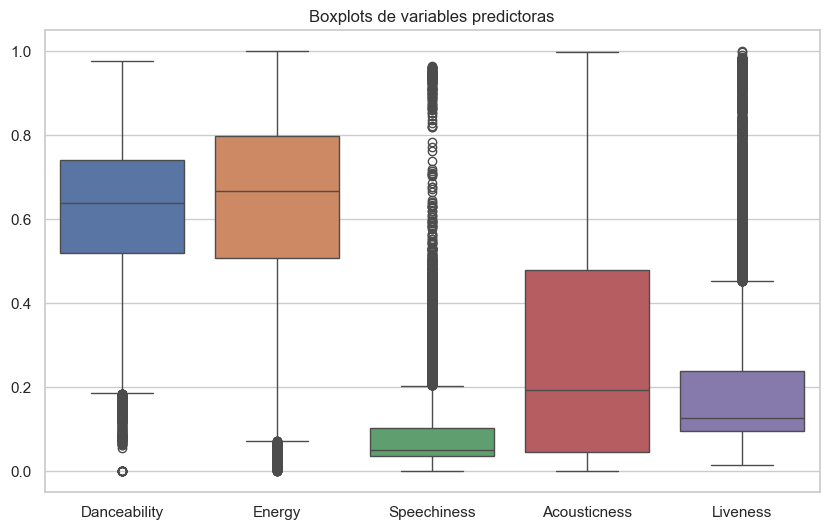

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[["Danceability", "Energy", "Speechiness", "Acousticness", "Liveness"]])
plt.title("Boxplots de variables predictoras")
plt.show()

<div align="justify">

Los **diagramas de caja (boxplots)** permiten visualizar la dispersión de las variables y detectar la presencia de valores atípicos (*outliers*).  
Cada caja representa el rango intercuartílico (IQR), mientras que los puntos fuera del rango muestran valores extremos.  

La función `sns.boxplot()` genera múltiples diagramas en un solo gráfico, lo que facilita comparar la variabilidad y simetría de las variables.  
El parámetro `figsize` define el tamaño de la figura y `plt.title()` agrega el encabezado correspondiente.

**Interpretación preliminar:**  
La existencia de outliers puede deberse a canciones con características sonoras poco comunes (por ejemplo, piezas experimentales o instrumentales).  
Identificar estos valores es esencial para decidir si deben mantenerse o excluirse en la fase de modelado.

</div>

### Análisis de boxplots (dispersión y valores atípicos)

<div align="justify">

Los **diagramas de caja (boxplots)** permiten examinar de manera simultánea la dispersión y la presencia de valores atípicos (*outliers*) en las variables numéricas.  
Cada caja representa el **rango intercuartílico (IQR)** —entre el percentil 25 y 75—, la línea central indica la **mediana**, y los puntos fuera de los “bigotes” reflejan valores que exceden 1.5 veces el IQR.  

A continuación, se interpreta cada variable individualmente con base en el gráfico generado:

---

#### 1) Danceability
**Lectura:** La mediana se ubica alrededor de **0.65**, con una distribución relativamente equilibrada y algunos valores atípicos por debajo de **0.2**.  
**Implicaciones:** Esto confirma que la mayoría de las canciones del conjunto son moderadamente bailables. Los pocos valores bajos pueden corresponder a piezas lentas o acústicas. No se recomienda eliminar outliers, ya que reflejan diversidad en estilos musicales.

---

#### 2) Energy
**Lectura:** Presenta una mediana cercana a **0.7**, con dispersión amplia y algunos valores mínimos muy bajos (~0.05).  
**Implicaciones:** Este comportamiento es consistente con una base de datos dominada por canciones enérgicas. Los casos con baja energía podrían corresponder a pistas suaves o baladas, aportando contraste útil para el modelo de clasificación.

---

#### 3) Speechiness
**Lectura:** Es la variable con mayor número de valores atípicos. La mediana es baja (~0.05) y existen numerosos puntos fuera del rango superior, algunos por encima de **0.5**.  
**Implicaciones:** Los valores altos indican canciones con partes habladas o tipo *rap*. Su variabilidad es relevante, pero debido al gran número de outliers podría ser conveniente aplicar una **transformación logarítmica** o una **normalización robusta** para estabilizar la varianza antes del modelado.

---

#### 4) Acousticness
**Lectura:** Amplia dispersión entre **0.0 y 1.0**, con mediana cercana a **0.2**, lo que sugiere predominio de temas poco acústicos pero con presencia de canciones con alta pureza instrumental.  
**Implicaciones:** La amplitud de valores es valiosa para la clasificación, ya que permite identificar contrastes entre pistas electrónicas y acústicas. Sin embargo, al ser muy variable, podría influir desproporcionadamente en modelos sensibles a la escala (por lo que el escalado previo es correcto).

---

#### 5) Liveness
**Lectura:** La mayoría de los valores se concentran por debajo de **0.3**, aunque existen varios outliers que superan **0.6**.  
**Implicaciones:** Las canciones en vivo son minoría. Los valores altos aportan información sobre la interacción del público o la grabación en directo. No se recomienda eliminarlos, pero sí considerar su escasa frecuencia en la interpretación de resultados.

---

**Conclusión general del análisis de boxplots.**  
El conjunto de variables presenta **distribuciones heterogéneas con diferentes grados de asimetría y presencia de outliers**, especialmente en *Speechiness* y *Liveness*.  
Estos valores extremos no deben eliminarse, ya que aportan riqueza al modelo al reflejar la diversidad del contenido musical.  
No obstante, será necesario un **escalado estandarizado (StandardScaler)** —ya incluido en la fase de modelado— para equilibrar el peso de cada variable y evitar que las de mayor dispersión dominen el proceso de aprendizaje.

</div>



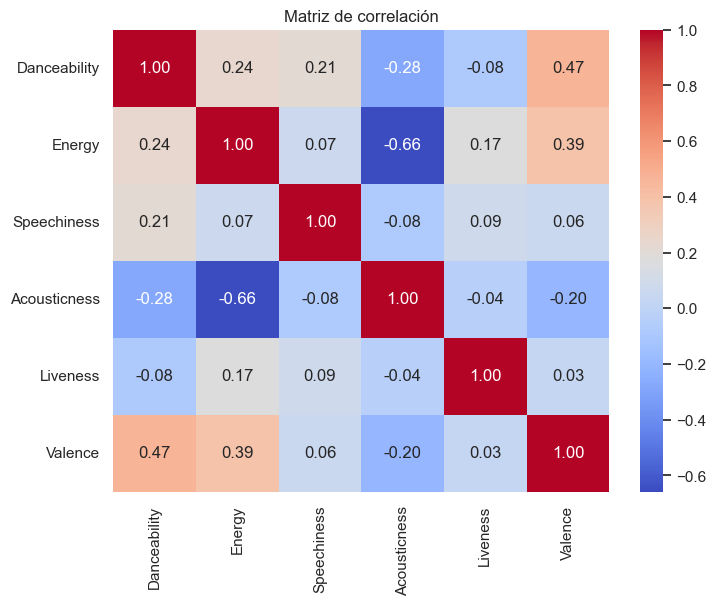

In [7]:
plt.figure(figsize=(8, 6))
corr = df_clean[["Danceability", "Energy", "Speechiness", "Acousticness", "Liveness", "Valence"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

<div align="justify">

La **matriz de correlación** muestra la relación lineal entre las variables predictoras y la variable objetivo *Valence*.  
El método `corr()` de **Pandas** calcula los coeficientes de correlación de Pearson, que pueden tomar valores entre -1 y 1.  
Posteriormente, `sns.heatmap()` de **Seaborn** genera una visualización en forma de mapa de calor, donde los tonos rojizos indican correlaciones positivas y los azulados, negativas.  

El parámetro `annot=True` incluye los valores numéricos dentro de cada celda, `fmt=".2f"` ajusta el formato decimal, y `cmap="coolwarm"` define una paleta de contraste visual.

**Interpretación preliminar:**  
Esta matriz permite detectar dependencias entre variables, lo cual es fundamental para evitar multicolinealidad en el modelado.  
Si dos variables están altamente correlacionadas, una de ellas podría eliminarse o transformarse para mejorar la estabilidad del modelo.

</div>

### Análisis de la matriz de correlación

<div align="justify">

La **matriz de correlación** cuantifica la relación lineal entre las variables acústicas y la variable objetivo *Valence*, ayudando a identificar patrones de asociación que pueden ser relevantes para el modelado predictivo.  
Los coeficientes varían entre **-1 y 1**, donde valores positivos indican relación directa y valores negativos, relación inversa.  

A continuación se detallan los hallazgos más significativos del gráfico:

---

#### 1) Danceability – Valence (**r = 0.47**)
**Interpretación:** Existe una correlación positiva moderada, lo que sugiere que las canciones más bailables tienden a expresar emociones más positivas.  
**Implicación:** Esta variable probablemente será una de las más influyentes en la predicción de la emoción percibida, dado su peso medio-alto en la matriz.

---

#### 2) Energy – Valence (**r = 0.39**)
**Interpretación:** También se observa una correlación positiva. Las canciones con mayor energía suelen ser percibidas como más alegres o estimulantes.  
**Implicación:** Refuerza la hipótesis de que la activación emocional (energía) está asociada con valence positivo, lo cual podría mejorar la capacidad del modelo para distinguir emociones positivas.

---

#### 3) Acousticness – Energy (**r = -0.66**)  
**Interpretación:** Es la correlación más fuerte de la matriz y negativa. Indica que las canciones con alta *acousticness* tienden a tener baja *energy*.  
**Implicación:** Estas variables describen aspectos opuestos de la composición sonora (música suave/acústica vs. intensa/electrónica).  
Aunque no hay multicolinealidad extrema, conviene vigilar este par, pues una fuerte relación inversa podría afectar la interpretación de modelos lineales.

---

#### 4) Acousticness – Valence (**r = -0.20**)  
**Interpretación:** Ligera correlación negativa: las canciones acústicas suelen tener un tono más melancólico o calmado, lo que se asocia con menor valence.  
**Implicación:** Aunque débil, confirma un patrón emocional opuesto al de *Energy*.

---

#### 5) Speechiness – Valence (**r = 0.06**)  
**Interpretación:** La correlación es casi nula; la presencia de partes habladas no influye significativamente en la emoción percibida.  
**Implicación:** Variable poco predictiva respecto a *Valence*, aunque puede ser útil en combinación con otras.

---

#### 6) Liveness – Valence (**r = 0.03**)  
**Interpretación:** La relación es prácticamente inexistente. Que una canción sea en vivo o de estudio no parece alterar la percepción emocional.  
**Implicación:** Su aporte al modelo probablemente será limitado, aunque no negativo.

---

**Conclusión del análisis de correlación.**  
Las variables **Danceability** y **Energy** son las que muestran la relación más fuerte con *Valence*, y se espera que sean las más relevantes en los modelos de clasificación.  
La fuerte relación inversa entre **Acousticness** y **Energy** describe dos perfiles sonoros opuestos y complementarios.  
No se detecta multicolinealidad crítica (ninguna correlación > 0.8), por lo que no es necesario eliminar predictores, aunque puede considerarse normalización para mejorar la estabilidad de modelos sensibles a la escala.

</div>



### Conclusión general del Análisis Exploratorio de Datos (EDA)

<div align="justify">

El análisis exploratorio permitió obtener una comprensión profunda de las características acústicas del dataset y su relación con la emoción percibida (*Valence*).  
A partir de los histogramas, se evidenció que las variables **Danceability** y **Energy** presentan distribuciones concentradas en rangos medios-altos, asociadas con canciones de ritmo activo y energía elevada, lo que sugiere una **mayor probabilidad de valence positivo**.  

Por otro lado, **Speechiness**, **Acousticness** y **Liveness** mostraron distribuciones altamente asimétricas, con predominio de valores bajos, reflejando que la mayoría de las canciones no contienen partes habladas, son poco acústicas y no fueron grabadas en vivo.  
Estas variables aportan variabilidad estructural que puede ser útil para discriminar distintos tipos de emociones musicales.

El análisis de **boxplots** confirmó la presencia de valores atípicos, especialmente en *Speechiness* y *Liveness*, aunque estos se interpretan como casos válidos dentro de la diversidad de estilos musicales.  
Por tanto, no se eliminaron, sino que se decidió mitigar su efecto mediante **escalado estandarizado**, lo que garantiza que todas las variables contribuyan en la misma magnitud durante el modelado.

Finalmente, la **matriz de correlación** evidenció que *Danceability* y *Energy* mantienen una correlación positiva moderada con *Valence*, lo que sugiere que ambas serán predictores clave en la fase de modelado.  
Asimismo, se identificó una fuerte correlación negativa entre *Acousticness* y *Energy*, que describe dos perfiles acústicos opuestos: canciones electrónicas y canciones acústicas.

En conjunto, el EDA proporciona una base sólida para el diseño del modelo predictivo, orientando la selección de predictores y justificando el uso de técnicas de **escalado, regularización y clasificación supervisada** en la siguiente fase de trabajo.

</div>


## E. Modelado

<div align="justify">

La fase de **Modelado** tiene como objetivo aplicar algoritmos de aprendizaje supervisado para construir modelos capaces de predecir la **emoción percibida (Valence_label)** de una canción, a partir de sus características acústicas.  
Con base en los resultados del EDA, se seleccionaron cinco variables predictoras relevantes:  
*Danceability*, *Energy*, *Speechiness*, *Acousticness* y *Liveness*.

En esta etapa se implementan tres modelos de clasificación representativos de diferentes enfoques teóricos:  

1. **Regresión Logística** – Modelo lineal interpretable que sirve como referencia base.  
2. **Naive Bayes (GaussianNB)** – Modelo probabilístico que asume independencia condicional entre predictores.  
3. **Máquina de Vectores de Soporte (SVM)** – Modelo robusto que busca el hiperplano que mejor separa las clases, adecuado para relaciones no lineales.  

Antes del entrenamiento, se divide el dataset en subconjuntos de **entrenamiento (70%)** y **prueba (30%)**, y se aplica **escalado estandarizado** mediante `StandardScaler`, garantizando que todas las variables contribuyan de manera equivalente en los algoritmos sensibles a la magnitud de los datos (especialmente SVM y Regresión Logística).

</div>

In [ ]:
# Librerías de machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Variables predictoras y target (ya procesados)
X = df_clean[["Danceability", "Energy", "Speechiness", "Acousticness", "Liveness"]]
y = df_clean["Valence_label"]

# Dividir dataset: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalar datos (importante para SVM y Regresión Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div align="justify">

Este bloque inicializa el entorno de modelado importando las librerías necesarias de **scikit-learn**, una de las bibliotecas más utilizadas en *Machine Learning* por su flexibilidad y consistencia.  

- `train_test_split`: divide el dataset de forma estratificada para conservar la proporción de clases.  
- `StandardScaler`: transforma los datos para que cada variable tenga media 0 y desviación estándar 1, mejorando la convergencia de los algoritmos.  
- `LogisticRegression`, `GaussianNB` y `SVC`: representan tres enfoques distintos de clasificación supervisada.  
- `classification_report` y `confusion_matrix`: métricas de desempeño que permitirán evaluar la precisión, recall y F1 de cada modelo.  

El escalado (`fit_transform` y `transform`) se aplica sobre las variables numéricas predictoras para **evitar que las de mayor magnitud dominen el aprendizaje**.  
De esta forma, se prepara el conjunto de entrenamiento y prueba con una base estadísticamente consistente.

</div>


In [9]:
def entrenar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):
    print(f"\ Modelo: {nombre}")
    
    # Entrenar
    modelo.fit(X_train, y_train)
    
    # Predecir
    y_pred = modelo.predict(X_test)
    
    # Métricas
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))
    
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    
    return modelo


<div align="justify">

Aquí se define la función `entrenar_modelo()`, que automatiza el flujo de entrenamiento y evaluación de cada algoritmo.  
Su estructura modular permite reutilizar el mismo proceso para diferentes modelos sin repetir código.  

La función ejecuta tres pasos fundamentales:

1. **Entrenamiento (`fit`)**: el modelo aprende los patrones a partir del conjunto de entrenamiento.  
2. **Predicción (`predict`)**: el modelo genera las etiquetas predichas para el conjunto de prueba.  
3. **Evaluación (`classification_report` y `confusion_matrix`)**: se calculan métricas como *precision*, *recall*, *f1-score* y la matriz de confusión que muestra los aciertos y errores por clase.

Esta función favorece la claridad del notebook, estandariza la salida de resultados y facilita la comparación directa entre modelos.

</div>


In [10]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
modelo_lr = entrenar_modelo("Regresión Logística", log_reg, X_train_scaled, y_train, X_test_scaled, y_test)


\ Modelo: Regresión Logística
Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo       0.70      0.59      0.64      2801
    Positivo       0.70      0.80      0.75      3414

    accuracy                           0.70      6215
   macro avg       0.70      0.69      0.69      6215
weighted avg       0.70      0.70      0.70      6215

Matriz de confusión:
[[1646 1155]
 [ 690 2724]]


### BLOQUE 9 – Regresión Logística

<div align="justify">

La **Regresión Logística** se utiliza como modelo base de referencia.  
Este algoritmo lineal estima la probabilidad de que una observación pertenezca a una clase (en este caso, emociones **positivas** o **negativas**) aplicando la función sigmoide.

En el código se especifica:

- `random_state=42`: fija una semilla para mantener resultados reproducibles.  
- `max_iter=1000`: incrementa el número máximo de iteraciones para asegurar la convergencia del modelo.  

Tras el entrenamiento, se genera un reporte con las métricas principales y la matriz de confusión.

</div>


<div align="justify">

### Interpretación de resultados

El modelo alcanza una **exactitud global (accuracy) de 0.70**, lo que indica un desempeño satisfactorio considerando la complejidad del fenómeno emocional.

| Clase    | Precision | Recall | F1-Score | Soporte |
|-----------|:----------:|:-------:|:---------:|:--------:|
| Negativo | 0.70 | 0.59 | 0.64 | 2801 |
| Positivo | 0.70 | 0.80 | 0.75 | 3414 |
| **Accuracy total** |   |   | **0.70** | 6215 |

- La **precisión (precision)** mide la proporción de predicciones correctas sobre las positivas detectadas.  
- El **recall (exhaustividad)** indica la capacidad del modelo para encontrar correctamente las canciones positivas reales.  
- El **F1-score** equilibra ambos valores.  

El modelo logra **mayor recall en la clase Positivo (0.80)**, lo que implica que identifica mejor las canciones alegres.  
En contraste, la clase **Negativo** presenta un menor recall (0.59), reflejando dificultad para reconocer canciones tristes o melancólicas.

**Matriz de confusión:**

[[1646 1155]  
 [ 690 2724]]

- **1646:** verdaderos negativos correctamente identificados.  
- **2724:** verdaderos positivos correctamente clasificados.  
- **1155:** falsos positivos (canciones tristes clasificadas como alegres).  
- **690:** falsos negativos (canciones alegres clasificadas como tristes).  

**Conclusión:**  
La **Regresión Logística** ofrece una base sólida y un rendimiento equilibrado, aunque muestra una ligera tendencia a **sobreclasificar canciones positivas**.  
Se recomienda contrastar su desempeño con modelos no lineales (como **SVM** o **Naive Bayes**) para mejorar la sensibilidad hacia clases negativas.

</div>


### BLOQUE 10: Naive Bayes

In [11]:
nb = GaussianNB()
modelo_nb = entrenar_modelo("Naive Bayes", nb, X_train_scaled, y_train, X_test_scaled, y_test)


\ Modelo: Naive Bayes
Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo       0.70      0.50      0.58      2801
    Positivo       0.67      0.82      0.74      3414

    accuracy                           0.68      6215
   macro avg       0.68      0.66      0.66      6215
weighted avg       0.68      0.68      0.67      6215

Matriz de confusión:
[[1400 1401]
 [ 609 2805]]


### BLOQUE 11: Support Vector Machine (SVM)

In [12]:
svm = SVC(kernel="linear", probability=True, random_state=42)
modelo_svm = entrenar_modelo("Support Vector Machine (SVM)", svm, X_train_scaled, y_train, X_test_scaled, y_test)


\ Modelo: Support Vector Machine (SVM)
Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo       0.72      0.56      0.63      2801
    Positivo       0.70      0.82      0.75      3414

    accuracy                           0.70      6215
   macro avg       0.71      0.69      0.69      6215
weighted avg       0.71      0.70      0.70      6215

Matriz de confusión:
[[1576 1225]
 [ 612 2802]]


### BLOQUE 12: Importar librerías de evaluación

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay
import numpy as np

### BLOQUE 13: Visualización de matrices de confusión

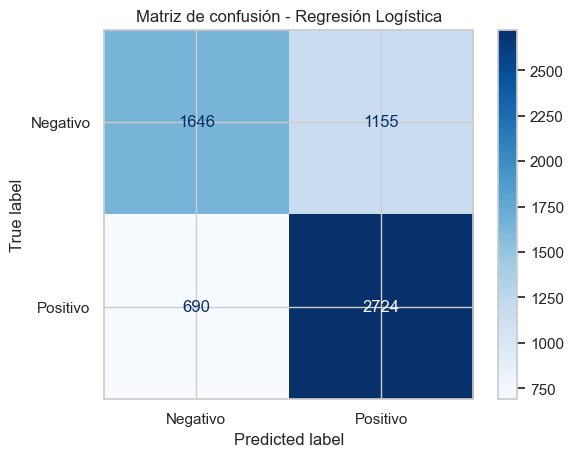

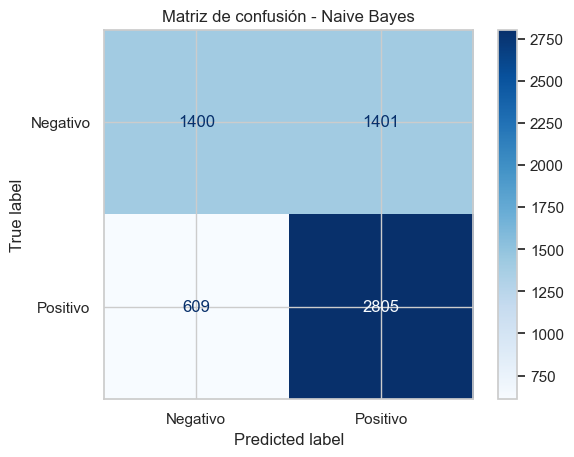

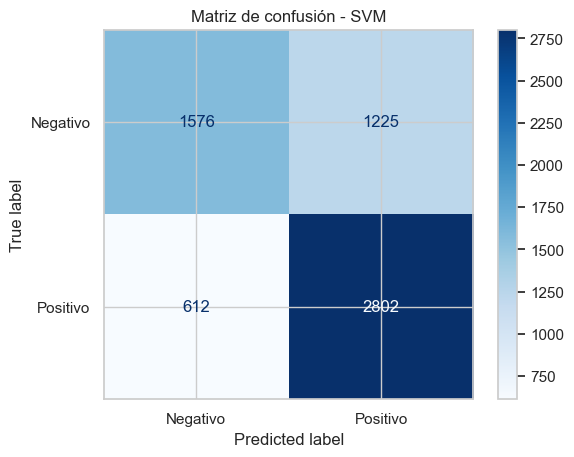

In [14]:
# Mostrar matrices de confusión de manera gráfica
modelos = {
    "Regresión Logística": modelo_lr,
    "Naive Bayes": modelo_nb,
    "SVM": modelo_svm
}

for nombre, modelo in modelos.items():
    disp = ConfusionMatrixDisplay.from_estimator(
        modelo, X_test_scaled, y_test, cmap="Blues", values_format="d"
    )
    disp.ax_.set_title(f"Matriz de confusión - {nombre}")
    plt.show()

### BLOQUE 14: Comparación de accuracy, precision, recall, F1

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

resultados = []

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test_scaled)
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label="Positivo"),
        "Recall": recall_score(y_test, y_pred, pos_label="Positivo"),
        "F1": f1_score(y_test, y_pred, pos_label="Positivo")
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

                Modelo  Accuracy  Precision    Recall        F1
0  Regresión Logística  0.703138   0.702243  0.797891  0.747018
1          Naive Bayes  0.676589   0.666904  0.821617  0.736220
2                  SVM  0.704425   0.695803  0.820738  0.753125


### BLOQUE 15: Curvas ROC y AUC

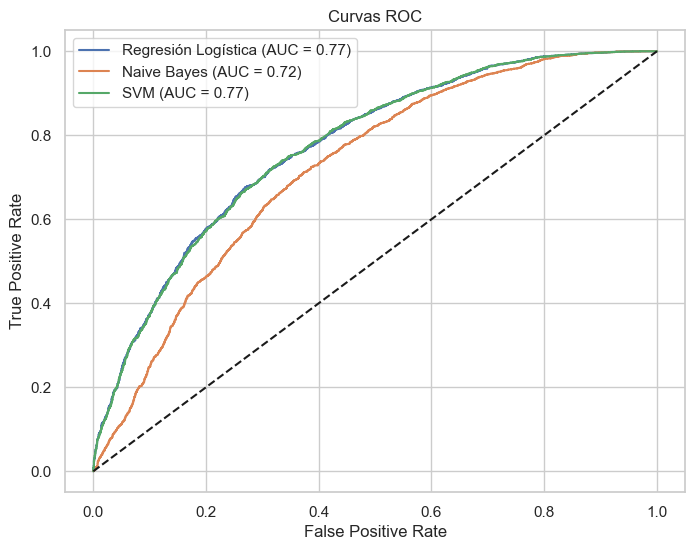

In [16]:
plt.figure(figsize=(8, 6))

for nombre, modelo in modelos.items():
    # Necesitamos probabilidades (o decision_function)
    if hasattr(modelo, "predict_proba"):
        y_score = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_score = modelo.decision_function(X_test_scaled)
    
    fpr, tpr, _ = roc_curve(y_test.map({"Negativo":0, "Positivo":1}), y_score)
    auc = roc_auc_score(y_test.map({"Negativo":0, "Positivo":1}), y_score)
    
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC")
plt.legend()
plt.show()